In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('image.jpg', 0)
template = img[200:500,100:500]

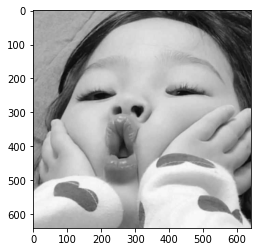

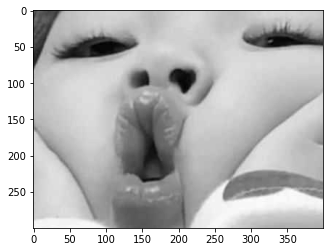

In [3]:
plt.imshow(img, 'gray')
plt.show()
plt.imshow(template, 'gray')
plt.show()

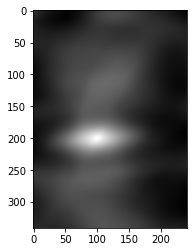

In [4]:
# 模板匹配
# 匹配函数返回的是一副灰度图，最白的地方表示最大的匹配
res = cv2.matchTemplate(img, template, cv2.TM_CCOEFF)
plt.imshow(res, 'gray')
plt.show()

(100, 200)


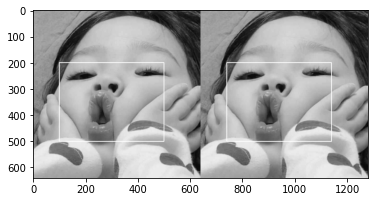

In [5]:
h, w = template.shape[:2]
img1 = np.copy(img)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
# 左上角
left_top = max_loc
print(left_top)
# 右下角
right_bottom = (left_top[0] + w, left_top[1] + h)  
# 画出矩形位置
cv2.rectangle(img, (100, 200), (500, 500), 255, 2)
cv2.rectangle(img1, left_top, right_bottom, 255, 2)
plt.imshow(np.hstack((img,img1)), 'gray')
plt.show()

In [6]:
# 匹配多个物体
img = cv2.imread('mario.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
template = cv2.imread('mario_coin.jpg', 0)

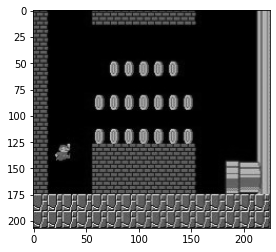

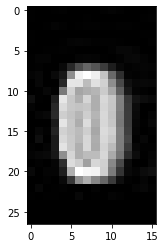

In [7]:
plt.imshow(img_gray, 'gray')
plt.show()
plt.imshow(template, 'gray')
plt.show()

In [8]:
h,w = template.shape[:2]
# 标准相关模板匹配
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8 
# 匹配程度大于%80的坐标y,x
loc = np.where(res >= threshold)
for pt in zip(*loc[::-1]):
    right_bottom = (pt[0] + w, pt[1] + h)
    cv2.rectangle(img, pt, right_bottom, (0, 0, 255), 2)

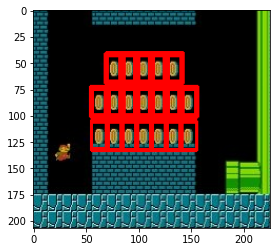

In [9]:
plt.imshow(img[:,:,::-1])
plt.show()